### Movie Success Prediction - ML Modeling & Evaluation
#### Step-by-step machine learning workflow on the cleaned movie dataset


In [1]:
# 1. Imports: Libraries for ML, data handling, and visualization

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

import joblib

In [9]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'actor_1_name', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster',
       'plot_keywords', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'action',
       'adventure', 'animation', 'biography', 'comedy', 'crime', 'documentary',
       'drama', 'family', 'fantasy', 'film-noir', 'game-show', 'history',
       'horror', 'music', 'musical', 'mystery', 'news', 'reality-tv',
       'romance', 'sci-fi', 'short', 'sport', 'thriller', 'war', 'western',
       'log_gross', 'log_budget', 'log_cast_total_facebook_likes',
       'log_num_voted_users', 'roi', 'star_power', 'movie_age',
       'success_category', 'aspect_ratio_missing'],


#### 2. Load the Cleaned Dataset


In [2]:
# Load your final cleaned dataset
df = pd.read_csv(r'C:\Users\Derrick T\Desktop\Movie Success\data\final_cleaned_featured_movie_data.csv')

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (3857, 60)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,western,log_gross,log_budget,log_cast_total_facebook_likes,log_num_voted_users,roi,star_power,movie_age,success_category,aspect_ratio_missing
0,1.0,79,723.0,178.0,0.0,855.0,104,1000.0,3.324679e+08,155,...,0.0,19.622054,19.113828,8.483636,13.694704,1.662340,2791.0,16.0,Average,0
1,1.0,71,302.0,169.0,563.0,1000.0,103,40000.0,3.094042e+08,101,...,0.0,19.550159,19.113828,10.786242,13.063082,1.547021,46563.0,18.0,Average,0
2,1.0,185,602.0,148.0,0.0,161.0,104,11000.0,2.000742e+08,155,...,0.0,19.114199,19.113828,9.367430,12.527681,1.000371,11554.0,10.0,Average,0
3,1.0,33,813.0,164.0,22000.0,23000.0,27,27000.0,3.324679e+08,187,...,0.0,19.622054,19.113828,11.578339,13.950337,1.662340,95000.0,13.0,Average,0
4,1.0,147,462.0,132.0,475.0,530.0,104,640.0,7.305868e+07,155,...,0.0,18.106774,19.113828,7.535830,12.265308,0.365293,2277.0,13.0,Flop,0


#### 3. Train/Test Split


In [3]:
# Select features and target variable
X = df.drop(['success_category'], axis=1)
y = df['success_category']

# Stratified split for balanced classes in train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (3085, 59) Test shape: (772, 59)


#### 4. Encoding the missed out columns in data cleaning process

In [4]:
print("Object columns in features:", X.select_dtypes(include='object').columns.tolist())

Object columns in features: ['actor_3_name', 'plot_keywords']


In [5]:
from sklearn.preprocessing import LabelEncoder

for col in X.select_dtypes(include='object').columns:
    lbl = LabelEncoder()
    # Fill NAs with 'Unknown' beforehand if any
    X[col] = X[col].fillna('Unknown')
    X[col] = lbl.fit_transform(X[col])

#### Re-Splitting

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#### 4. Baseline Model Training (Random Forest)


In [7]:
# Random Forest classifier training
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

print("Random Forest trained.")

Random Forest trained.


#### 5. Baseline Model Training (Gradient Boosting)


In [8]:
# Gradient Boosting classifier training
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

print("Gradient Boosting trained.")

Gradient Boosting trained.


#### 6. Model Evaluation: Random Forest


Random Forest Classification Report:
               precision    recall  f1-score   support

     Average       1.00      1.00      1.00       190
        Flop       1.00      1.00      1.00       364
         Hit       1.00      1.00      1.00       218

    accuracy                           1.00       772
   macro avg       1.00      1.00      1.00       772
weighted avg       1.00      1.00      1.00       772



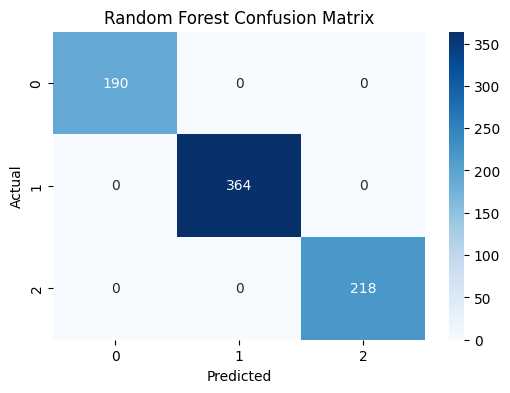

Random Forest ROC-AUC: 1.000


In [9]:
# RF predictions and report
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix visualization
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC-AUC for multi-class
y_proba_rf = rf.predict_proba(X_test)
score_rf = roc_auc_score(pd.get_dummies(y_test), y_proba_rf, average='macro')
print(f"Random Forest ROC-AUC: {score_rf:.3f}")

#### 7. Model Evaluation: Gradient Boosting


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

     Average       1.00      1.00      1.00       190
        Flop       1.00      1.00      1.00       364
         Hit       1.00      1.00      1.00       218

    accuracy                           1.00       772
   macro avg       1.00      1.00      1.00       772
weighted avg       1.00      1.00      1.00       772



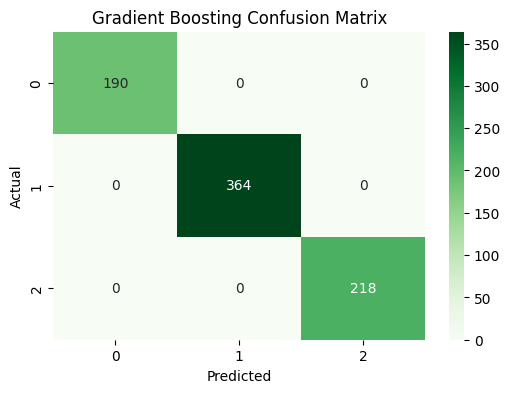

Gradient Boosting ROC-AUC: 1.000


In [10]:
# GB predictions and report
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))

# Confusion matrix visualization
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Greens')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC-AUC for multi-class
y_proba_gb = gb.predict_proba(X_test)
score_gb = roc_auc_score(pd.get_dummies(y_test), y_proba_gb, average='macro')
print(f"Gradient Boosting ROC-AUC: {score_gb:.3f}")


#### 8. Hyperparameter Tuning: Random Forest Example


In [11]:
# Grid Search for Random Forest hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    n_jobs=-1,
    scoring='f1_macro'
)
grid_rf.fit(X_train, y_train)
print("Best RF Params:", grid_rf.best_params_)

# Get the best RF model
rf_best = grid_rf.best_estimator_


Best RF Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


#### 9. Feature Importance (Random Forest)


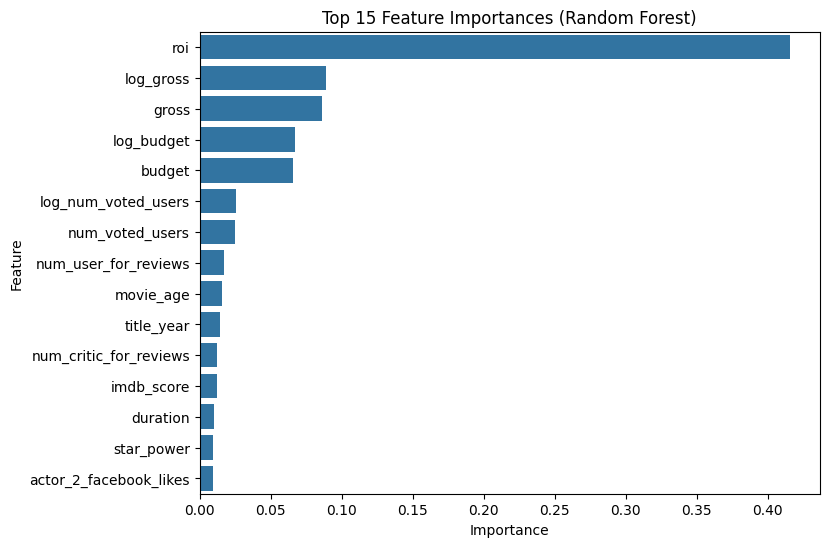

In [12]:
# Visualize top features for interpretation
importances = rf_best.feature_importances_
indices = np.argsort(importances)[::-1]

top_n = 15
plt.figure(figsize=(8,6))
sns.barplot(x=importances[indices][:top_n], y=X.columns[indices][:top_n])
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


#### 10. Save Best Model


In [15]:
joblib.dump(rf_best, r'C:\Users\Derrick T\Desktop\Movie Success\models\rf_best_model.pkl')
print("Saved best Random Forest model.")

Saved best Random Forest model.


#### 11. Quick Inference Example


In [18]:
# Load and make a prediction on a sample test case
model = joblib.load(r'C:\Users\Derrick T\Desktop\Movie Success\models\rf_best_model.pkl')
sample = X_test.iloc[[0]]
print("Predicted success category:", model.predict(sample))

Predicted success category: ['Hit']


In [19]:
print(model.feature_names_in_)

['color' 'director_name' 'num_critic_for_reviews' 'duration'
 'director_facebook_likes' 'actor_3_facebook_likes' 'actor_2_name'
 'actor_1_facebook_likes' 'gross' 'actor_1_name' 'num_voted_users'
 'cast_total_facebook_likes' 'actor_3_name' 'facenumber_in_poster'
 'plot_keywords' 'num_user_for_reviews' 'language' 'country'
 'content_rating' 'budget' 'title_year' 'actor_2_facebook_likes'
 'imdb_score' 'aspect_ratio' 'movie_facebook_likes' 'action' 'adventure'
 'animation' 'biography' 'comedy' 'crime' 'documentary' 'drama' 'family'
 'fantasy' 'film-noir' 'game-show' 'history' 'horror' 'music' 'musical'
 'mystery' 'news' 'reality-tv' 'romance' 'sci-fi' 'short' 'sport'
 'thriller' 'war' 'western' 'log_gross' 'log_budget'
 'log_cast_total_facebook_likes' 'log_num_voted_users' 'roi' 'star_power'
 'movie_age' 'aspect_ratio_missing']


In [22]:
print(y.dtypes)

object
